In [109]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_color_codes()

In [2]:
from dask.distributed import Client
import dask.bag as db
import dask.dataframe as dd
import dask

from ast import literal_eval
from collections import MutableMapping
import dask.array as da
import h5py
import os

In [3]:
client = Client(n_workers=4)

In [4]:
client

Client Scheduler: tcp://127.0.0.1:34919 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 16.69 GB


In [5]:
%%time 
x = np.random.normal(10, 0.1, size=(20000, 20000)) 
y = x.mean(axis=0)[::100] 
y

CPU times: user 19.9 s, sys: 1.25 s, total: 21.2 s
Wall time: 20.3 s


array([10.00058862, 10.00110813,  9.9990757 , 10.00156842,  9.99928966,
        9.99973506, 10.00004145,  9.99907583,  9.99954927,  9.99902972,
        9.99934156,  9.99935875, 10.00084661, 10.00133033,  9.99997901,
       10.00070405, 10.00053846,  9.99885989, 10.00012562,  9.99922648,
       10.00015133,  9.99980854,  9.99985813, 10.00036136, 10.00000706,
        9.99981655, 10.00086596, 10.00026158, 10.00051063,  9.99997737,
        9.99876422, 10.00007888, 10.00039049, 10.00118176,  9.99966206,
        9.99921081, 10.00014947,  9.99925942,  9.99995675, 10.00054786,
       10.00026263,  9.99919192,  9.99979648,  9.99916936, 10.00035401,
       10.00023143, 10.00108407,  9.99975369, 10.00075536,  9.99860005,
        9.99957046, 10.00005153, 10.00016386,  9.99870897, 10.0003976 ,
        9.99954827, 10.00033737, 10.00070425, 10.00127602,  9.99946029,
       10.00004861,  9.99946362, 10.0007994 , 10.001046  ,  9.99976748,
       10.00024311,  9.99927836, 10.00047757, 10.00023818,  9.99

In [6]:
%%time
x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(1000, 1000))
y = x.mean(axis=0)[::100]
y.compute() 

CPU times: user 1.43 s, sys: 139 ms, total: 1.57 s
Wall time: 4.93 s


array([ 9.99904554,  9.99983628, 10.00098045, 10.00083689, 10.00011183,
       10.00126837,  9.99952446, 10.00044093,  9.99979992, 10.00105513,
        9.99914172, 10.00034604, 10.00078958,  9.99963627,  9.99972019,
       10.00070064,  9.99832957, 10.00091053, 10.00077625,  9.99881375,
        9.99900856,  9.99911713,  9.99876715, 10.00105469, 10.00064792,
       10.00009814, 10.00003256,  9.99926491,  9.99925992,  9.99956297,
       10.00003079,  9.99777955,  9.99919712, 10.00004772,  9.99954625,
        9.99919181, 10.00124176, 10.00034456, 10.00011961,  9.99997187,
       10.0016166 , 10.00030869,  9.99916013, 10.00019607, 10.00068025,
       10.00020868,  9.99947406,  9.99978366,  9.99995436,  9.99953704,
       10.0000442 ,  9.99927934,  9.99970587, 10.00010745, 10.00078797,
       10.00125684, 10.00086196, 10.00098966,  9.99972789,  9.99925193,
        9.99996878, 10.00080513, 10.00025491, 10.00019754, 10.00044043,
       10.00206658,  9.99923365,  9.99836523, 10.0003683 ,  9.99

In [7]:
from ast import literal_eval
from collections import MutableMapping

b = db.read_text("reviews.clean.json")

In [8]:
samples = []
category = {}

In [9]:
for each in b.take(100000):
    processed = literal_eval(each)
    processed.pop('reviewerName')
    processed.pop('reviewText')
    processed.pop('unixReviewTime')
    processed.pop('reviewTime')
    
    if processed["categories"]: 
        for cat in processed["categories"]: 
            category[cat] = category.get(cat, 0) + 1
    
    samples.append(processed)

In [10]:
processed_db = db.from_sequence(samples, npartitions=20) ## Dividable by 4, the number of workers

In [11]:
del samples

In [12]:
processed_db.count().compute()

100000

In [13]:
df = processed_db.to_dataframe()

In [14]:
len(category)

4576

In [15]:
ratings = df["rating"].compute()

In [ ]:
times = df[""]

In [17]:
ratings.value_counts()

5.0    49760
4.0    23764
3.0    13329
2.0     7930
1.0     5217
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='Density'>

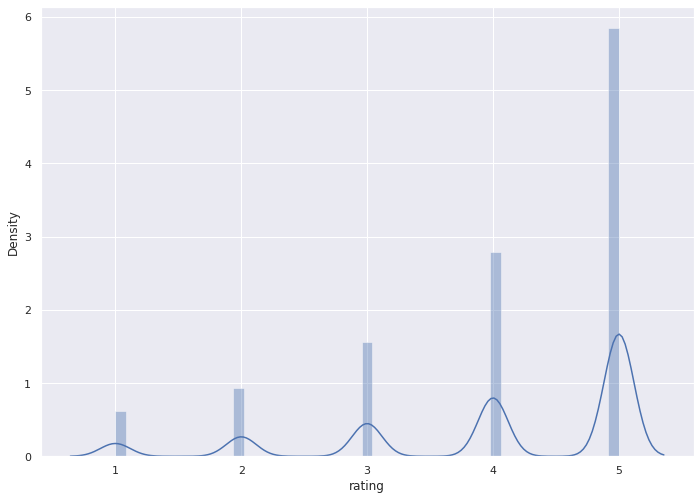

In [111]:
sns.set_theme(); np.random.seed(0)
sns.distplot(ratings)

In [38]:
# ReviewTime to Season, recent(<1, 2> )
# unixReviewTime to day-open, 24/7 etc
# Display reviews histogram by timezone (morning ,lunch, afternoon, dinner etc)

In [40]:
# Display most popular food genre by count
# e.g. American, Mexican, SeaFood etc
count = pd.Series(category).sort_values(ascending=False)
count[count >= 1000].index

Index(['Restaurant', 'Hotel', 'European Restaurant', 'Asian Restaurant',
       'American Restaurant', 'Italian Restaurant', 'Bar', 'Pizza Restaurant',
       'Fast Food Restaurant', 'Cafe', 'Mexican Restaurant',
       'Chinese Restaurant', 'Latin American Restaurant', 'Used Car Dealer',
       'Seafood Restaurant', 'Hamburger Restaurant', 'Coffee Shop',
       'Japanese Restaurant', 'Pub', 'Park', 'Bar & Grill',
       'Auto Repair Shop'],
      dtype='object')

In [41]:
count[(1000>count) & (count>500)].index

Index(['Shopping Mall', 'Steak House', 'Sandwich Shop', 'Movie Theater',
       'Auto Parts Store', 'Bakery', 'University', 'Barbecue Restaurant',
       'Lodging', 'Southeast Asian Restaurant', 'Indian Restaurant',
       'Sushi Restaurant', 'School', 'French Restaurant', 'Car Dealer',
       'Tourist Attraction', 'Hospital', 'South Asian Restaurant',
       'Supermarket', 'Mediterranean Restaurant', 'Tire Shop',
       'Thai Restaurant', 'Takeout Restaurant', 'Dessert Shop', 'Deli',
       'Beauty Salon', 'Department Store'],
      dtype='object')

In [42]:
count[count >= 500].index

Index(['Restaurant', 'Hotel', 'European Restaurant', 'Asian Restaurant',
       'American Restaurant', 'Italian Restaurant', 'Bar', 'Pizza Restaurant',
       'Fast Food Restaurant', 'Cafe', 'Mexican Restaurant',
       'Chinese Restaurant', 'Latin American Restaurant', 'Used Car Dealer',
       'Seafood Restaurant', 'Hamburger Restaurant', 'Coffee Shop',
       'Japanese Restaurant', 'Pub', 'Park', 'Bar & Grill', 'Auto Repair Shop',
       'Shopping Mall', 'Steak House', 'Sandwich Shop', 'Movie Theater',
       'Auto Parts Store', 'Bakery', 'University', 'Barbecue Restaurant',
       'Lodging', 'Southeast Asian Restaurant', 'Indian Restaurant',
       'Sushi Restaurant', 'School', 'French Restaurant', 'Car Dealer',
       'Tourist Attraction', 'Hospital', 'South Asian Restaurant',
       'Supermarket', 'Mediterranean Restaurant', 'Tire Shop',
       'Thai Restaurant', 'Takeout Restaurant', 'Dessert Shop', 'Deli',
       'Beauty Salon', 'Department Store'],
      dtype='object')

In [119]:
category_series = pd.Series(category)
restaurants = category_series[category_series.index.str.contains("Restaurant") | category_series.index.str.contains("Bar") | category_series.index.str.contains("Pub") ].sort_values(ascending=False)
restaurants.drop(["Restaurant"], inplace=True)
populars = restaurants[restaurants > 500]
populars

European Restaurant           4579
Asian Restaurant              4359
American Restaurant           3871
Italian Restaurant            3597
Bar                           3233
Pizza Restaurant              2883
Fast Food Restaurant          2804
Mexican Restaurant            1993
Chinese Restaurant            1952
Latin American Restaurant     1717
Seafood Restaurant            1436
Hamburger Restaurant          1410
Japanese Restaurant           1377
Pub                           1245
Bar & Grill                   1066
Barbecue Restaurant            789
Southeast Asian Restaurant     726
Indian Restaurant              705
Sushi Restaurant               681
French Restaurant              651
South Asian Restaurant         598
Mediterranean Restaurant       569
Thai Restaurant                556
Takeout Restaurant             548
dtype: int64

In [120]:
pd_df = pd.DataFrame(data={
    "genre": populars.index.map(lambda x: x.replace("Restaurant", "")),
    "count": populars.values
})
pd_df

,genre,count
0,European,4579
1,Asian,4359
2,American,3871
3,Italian,3597
4,Bar,3233
5,Pizza,2883
6,Fast Food,2804
7,Mexican,1993
8,Chinese,1952
9,Latin American,1717


<AxesSubplot:xlabel='count', ylabel='genre'>

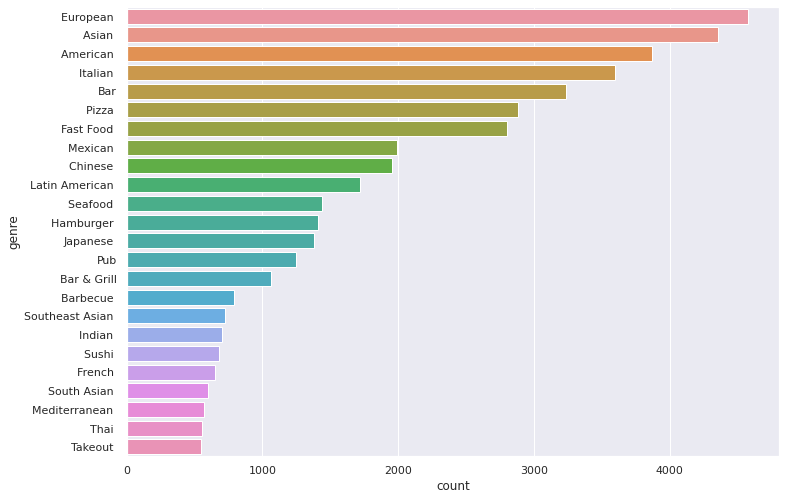

In [121]:
sns.barplot(y="genre", x="count", data=pd_df)

In [114]:
categories = df["categories"].compute()

In [115]:
categories

0                                   [Giải Trí - Café]
1                                   [Turkish Cuisine]
2       [Fishing, Pond Fish Supplier, Seafood Market]
3                                            [Museum]
4                                            [Police]
                            ...                      
4995                                     [Hotel, Pub]
4996                        [Restaurant, Steak House]
4997                                       [Bar, Pub]
4998                             [Takeout Restaurant]
4999                                        [Brewery]
Name: categories, Length: 100000, dtype: object

In [157]:
categories_df = pd.DataFrame(data={
    "categories": categories.values
})

In [158]:
categories_df

,categories
0,[Giải Trí - Café]
1,[Turkish Cuisine]
2,"[Fishing, Pond Fish Supplier, Seafood Market]"
3,[Museum]
4,[Police]
...,...
99995,"[Hotel, Pub]"
99996,"[Restaurant, Steak House]"
99997,"[Bar, Pub]"
99998,[Takeout Restaurant]


In [161]:
# If more than 1 category, then `fusion`
categories_df["isMoreThanOne"] = categories_df.apply((lambda row: len(row["categories"]) >= 2 if row["categories"] else False), axis=1)
categories_df

,categories,isMoreThanOne
0,[Giải Trí - Café],False
1,[Turkish Cuisine],False
2,"[Fishing, Pond Fish Supplier, Seafood Market]",True
3,[Museum],False
4,[Police],False
...,...,...
99995,"[Hotel, Pub]",True
99996,"[Restaurant, Steak House]",True
99997,"[Bar, Pub]",True
99998,[Takeout Restaurant],False


In [163]:
categories_df["isMoreThanOne"].value_counts()

False    56465
True     43535
Name: isMoreThanOne, dtype: int64

In [34]:
# Idea 1
# Row = User
# Col = Place Category (not each restaurant)
# If certain category is recommended, then choose one of restaurants with the category?
# (or make another recommender system within the category...?)

In [35]:
# Idea2
# Col = Each Restaurant (too many?)

In [ ]:
# Idea3
# Col = Restaurant&Food&Grocery, Movie&Cinema&Opera, Soccer&BasketBall&gym&Swimming, Shopping, Cafe

In [ ]:
# Idea4
# Feature
# 1. Quality Place = rating >= 4 or 5 (by join and aggregate)
# 2. Popular Place = # of reviews > N
# 3. Quiet Place = else
# 4. Only Open at Day? or All Day?
# 5. Near the beach? ( by GPS )

# Exclude Places whose ratings are under 2?

# How to reflect features 
# other than user and places into recommender system?
# => Content Based (e.g. Day? night? and food "Genre"s)